## CV Example - Fashion MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
mnist = tf.keras.datasets.fashion_mnist       # keras datasets

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

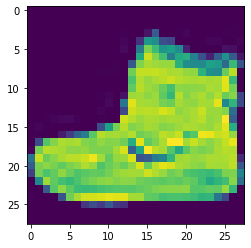

In [4]:
plt.imshow(train_images[0])

In [5]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_labels[0]

9

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_images[0]/255.0     # showing ouput value if image is normalized (0 to 1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
# normalizing train and test images
# but we wont use this in this experiment
# will use layers.Rescaling(1./255.) for same purpose

# train_images  = train_images / 255.0
# test_images = test_images / 255.0

In [ ]:
IMG_HEIGHT = 28
IMG_WIDTH = 28

In [6]:
len(np.unique(train_labels))

10

In [ ]:
NUM_CLASSES = len(np.unique(train_labels))

In [ ]:
model = Sequential([
      layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH)),                                     # note image shape is not expanded
      layers.Rescaling(1./255.),                                                                  # normalizing using layers
      layers.Flatten(),                                                                           # turning 28x28 image to 784x1
      layers.Dense(128, activation='relu'),
      layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer   = tf.keras.optimizers.Adam()
loss        = tf.keras.losses.SparseCategoricalCrossentropy()
metrics     = ['accuracy']

In [ ]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [ ]:
EPOCHS = 25

In [ ]:
history = model.fit(train_images,
                    train_labels,
                    epochs = EPOCHS,
                    validation_data = (test_images, test_labels),
                    verbose = 1)

Epoch 1/25
1875/1875 [==============================] - 8s 3ms/step - loss: 0.5052 - accuracy: 0.8241 - val_loss: 0.4294 - val_accuracy: 0.8456
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3776 - accuracy: 0.8648 - val_loss: 0.3919 - val_accuracy: 0.8597
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3365 - accuracy: 0.8773 - val_loss: 0.3678 - val_accuracy: 0.8687
Epoch 4/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3141 - accuracy: 0.8847 - val_loss: 0.3597 - val_accuracy: 0.8664
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2955 - accuracy: 0.8904 - val_loss: 0.3463 - val_accuracy: 0.8745
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2809 - accuracy: 0.8956 - val_loss: 0.3492 - val_accuracy: 0.8767
Epoch 7/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2679 - accuracy: 0.9003 - val_loss: 0.3523 - val_accuracy:

<Figure size 432x288 with 0 Axes>

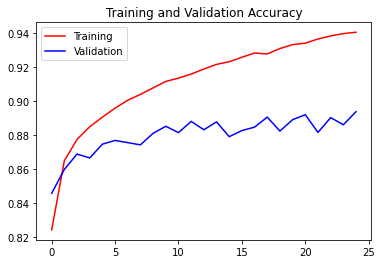

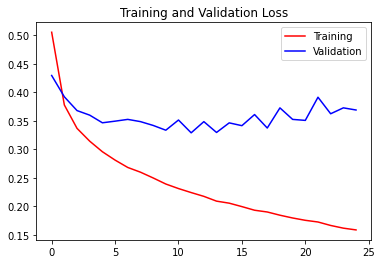

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3688 - accuracy: 0.8936


[0.3687707483768463, 0.8935999870300293]

## Using Callback to restrict Loss

In [ ]:
# function for loss restriction

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.3):
          print("\nLoss is less than 0.3 so cancelling training!")
          self.model.stop_training = True

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images  = train_images / 255.0
test_images = test_images / 255.0

IMG_HEIGHT = 28
IMG_WIDTH = 28
NUM_CLASSES = len(np.unique(train_labels))

model = Sequential([
      layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
      layers.Flatten(),                                                                           # turning 28x28 image to 784x1
      layers.Dense(128, activation='relu'),
      layers.Dense(NUM_CLASSES, activation='softmax')
])

optimizer   = tf.keras.optimizers.Adam()
loss        = tf.keras.losses.SparseCategoricalCrossentropy()
metrics     = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

EPOCHS = 25
CALLBACKS = [myCallback()]

history = model.fit(train_images,
                    train_labels,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    validation_data = (test_images, test_labels),
                    verbose = 1)

Epoch 1/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5004 - accuracy: 0.8242 - val_loss: 0.4405 - val_accuracy: 0.8422
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.8663 - val_loss: 0.3849 - val_accuracy: 0.8601
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3319 - accuracy: 0.8791 - val_loss: 0.3706 - val_accuracy: 0.8635
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3099 - accuracy: 0.8869 - val_loss: 0.3819 - val_accuracy: 0.8608
Epoch 5/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2930 - accuracy: 0.8912 - val_loss: 0.3395 - val_accuracy: 0.8808

Loss is less than 0.3 so cancelling training!


<Figure size 432x288 with 0 Axes>

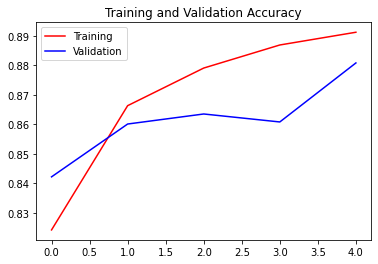

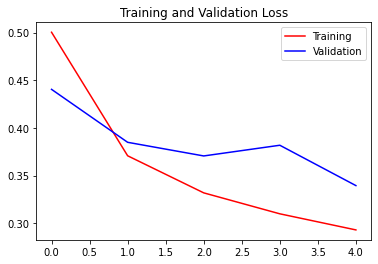

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

## MNIST Exercise

**Exercise 2**

In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:

- It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger.
- When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
- If you add any additional variables, make sure you use the same names as the ones used in the class.

In [ ]:
# function for accuracy restriction

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images  = train_images / 255.0
test_images = test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
IMG_HEIGHT = 28
IMG_WIDTH = 28
NUM_CLASSES = len(np.unique(train_labels))

model = Sequential([
      layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
      layers.Flatten(),                                                                           # turning 28x28 image to 784x1
      layers.Dense(512, activation='relu'),
      layers.Dense(NUM_CLASSES, activation='softmax')
])

optimizer   = tf.keras.optimizers.Adam()
loss        = tf.keras.losses.SparseCategoricalCrossentropy()
metrics     = ['accuracy']

model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

EPOCHS = 25
CALLBACKS = [myCallback()]

history = model.fit(train_images,
                    train_labels,
                    epochs = EPOCHS,
                    callbacks = CALLBACKS,
                    validation_data = (test_images, test_labels),
                    verbose = 1)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2011 - accuracy: 0.9407 - val_loss: 0.1009 - val_accuracy: 0.9701
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0811 - accuracy: 0.9752 - val_loss: 0.0768 - val_accuracy: 0.9758
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0706 - val_accuracy: 0.9779
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0742 - val_accuracy: 0.9765
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0698 - val_accuracy: 0.9796

Reached 99% accuracy so cancelling training!


<Figure size 432x288 with 0 Axes>

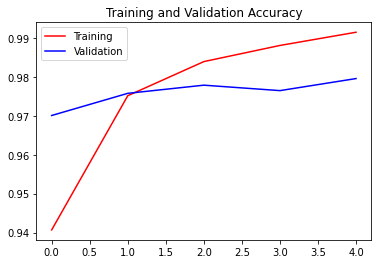

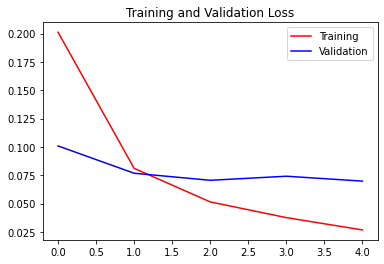

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()